In [ ]:
import tensorflow as tf
print(tf.__version__)
!python --version

2.7.0
Python 3.7.12


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/TFOD2

/content/gdrive/MyDrive/TFOD2


## Cloning TensorFlow Object Detection Repo

In [ ]:
!git clone https://github.com/tensorflow/models.git 

Cloning into 'models'...
remote: Enumerating objects: 67972, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 67972 (delta 3), reused 7 (delta 2), pack-reused 67960
Receiving objects: 100% (67972/67972), 576.44 MiB | 13.86 MiB/s, done.
Resolving deltas: 100% (47748/47748), done.
Checking out files: 100% (2950/2950), done.


## Installing Dependencies

In [ ]:
!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,908 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:3 http:/

## Environment Setup

In [ ]:
%cd /content/gdrive/MyDrive/TFOD2/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/MyDrive/TFOD2/models/research


In [ ]:
import os
import sys
os.environ['PYTHONPATH']+=":/content/gdrive/MyDrive/TFOD2/models"
sys.path.append("/content/gdrive/MyDrive/TFOD2/models/research")

In [ ]:
%cd /content/gdrive/MyDrive/TFOD2/models/research
!cp object_detection/packages/tf2/setup.py .

/content/gdrive/MyDrive/TFOD2/models/research


## Install and build Object Detection API

In [ ]:
!python setup.py build
!python setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/__init__.py -> build/lib/object_detection
copying object_detection/eval_util.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_tf2.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib_tf1_test.py -> build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detect

## Installation Test

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-12-14 23:56:15.468975: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W1214 23:56:16.479142 139993995134848 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 5.21s
I1214 23:56:17.538003 139993995134848 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 5.21s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.82s
I1214 23:56:19.363841 139993995134848 test

## Generate TFrecords

In [ ]:
pwd

'/content/gdrive/My Drive/TFOD2/models/research'

In [ ]:
cd /content/gdrive/MyDrive/TFOD2/worksplace

/content/gdrive/MyDrive/TFOD2/worksplace


In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/gdrive/MyDrive/TFOD2/worksplace/annotations/train -l /content/gdrive/MyDrive/TFOD2/worksplace/annotations/label_map.pbtxt -o /content/gdrive/MyDrive/TFOD2/worksplace/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/gdrive/MyDrive/TFOD2/worksplace/annotations/test -l /content/gdrive/MyDrive/TFOD2/worksplace/annotations/label_map.pbtxt -o /content/gdrive/MyDrive/TFOD2/worksplace/annotations/test.record

Successfully created the TFRecord file: /content/gdrive/MyDrive/TFOD2/worksplace/annotations/train.record
Successfully created the TFRecord file: /content/gdrive/MyDrive/TFOD2/worksplace/annotations/test.record


## Training

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [ ]:
cd /content/gdrive/MyDrive/TFOD2/worksplace/pre-trained-models

/content/gdrive/MyDrive/TFOD2/worksplace/pre-trained-models


In [ ]:
pwd

'/content/gdrive/MyDrive/TFOD2/worksplace/pre-trained-models'

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz

--2021-12-15 00:07:34--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.133.128, 2a00:1450:400c:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.133.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211996178 (202M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet5 100%[===================>] 202.17M  48.5MB/s    in 4.1s    

2021-12-15 00:07:39 (49.2 MB/s) - ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’ saved [211996178/211996178]



In [ ]:
!tar -xvf faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz

faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
pwd

'/content/gdrive/My Drive/TFOD2/worksplace/pre-trained-models'

In [ ]:
cd .. 

/content/gdrive/My Drive/TFOD2/worksplace


In [ ]:
!python model_main_tf2.py --model_dir=/content/gdrive/MyDrive/TFOD2/worksplace/models/my_faster_rcnn_resnet50 --pipeline_config_path=/content/gdrive/MyDrive/TFOD2/worksplace/models/my_faster_rcnn_resnet50/pipeline_bccd.config

2021-12-15 00:15:12.168020: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1215 00:15:12.171837 140569058719616 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I1215 00:15:12.788736 140569058719616 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1215 00:15:12.789098 140569058719616 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1215 00:15:12.832830 140569058719616 deprecation.py:347] From /usr/local/lib/python3.7/dist-packages/object_detection-0.1-py3.7.egg/object_detection/model_lib_v2.

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/gdrive/MyDrive/TFOD2/worksplace/models/my_faster_rcnn_resnet50/pipeline_bccd.config --trained_checkpoint_dir /content/gdrive/MyDrive/TFOD2/worksplace/models/my_faster_rcnn_resnet50 --output_directory /content/gdrive/MyDrive/TFOD2/worksplace/exported-models/my_model

2021-12-15 02:14:46.122468: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1215 02:14:46.462528 139851633661824 deprecation.py:619] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:464: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
INFO:tensorflow:depth of addition

## Inference

In [ ]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
PATH_TO_SAVED_MODEL="/content/gdrive/MyDrive/TFOD2/worksplace/exported-models/my_model/saved_model"
print('Loading model...', end='')

detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

Loading model...Done!


In [ ]:
category_index=label_map_util.create_category_index_from_labelmap("/content/gdrive/MyDrive/TFOD2/worksplace/annotations/label_map.pbtxt",use_display_name=True)

In [ ]:
img=['/content/gdrive/MyDrive/TFOD2/worksplace/test /Hammer (2207).JPEG','/content/gdrive/MyDrive/TFOD2/worksplace/test /Screwdriver (1411).JPEG','/content/gdrive/MyDrive/TFOD2/worksplace/test /Wrench (351).JPEG']
print(img)

['/content/gdrive/MyDrive/TFOD2/worksplace/test /Hammer (2207).JPEG', '/content/gdrive/MyDrive/TFOD2/worksplace/test /Screwdriver (1411).JPEG', '/content/gdrive/MyDrive/TFOD2/worksplace/test /Wrench (351).JPEG']


Running inference for /content/gdrive/MyDrive/TFOD2/worksplace/test /Hammer (2207).JPEG... Done


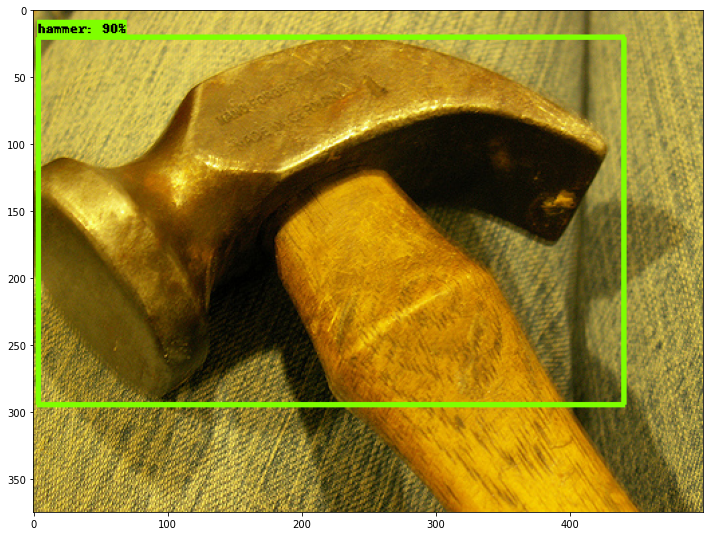

Running inference for /content/gdrive/MyDrive/TFOD2/worksplace/test /Screwdriver (1411).JPEG... Done


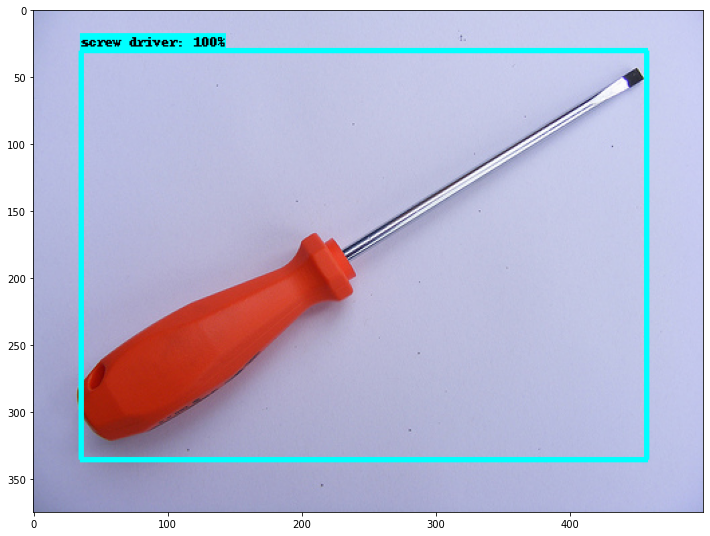

Running inference for /content/gdrive/MyDrive/TFOD2/worksplace/test /Wrench (351).JPEG... Done


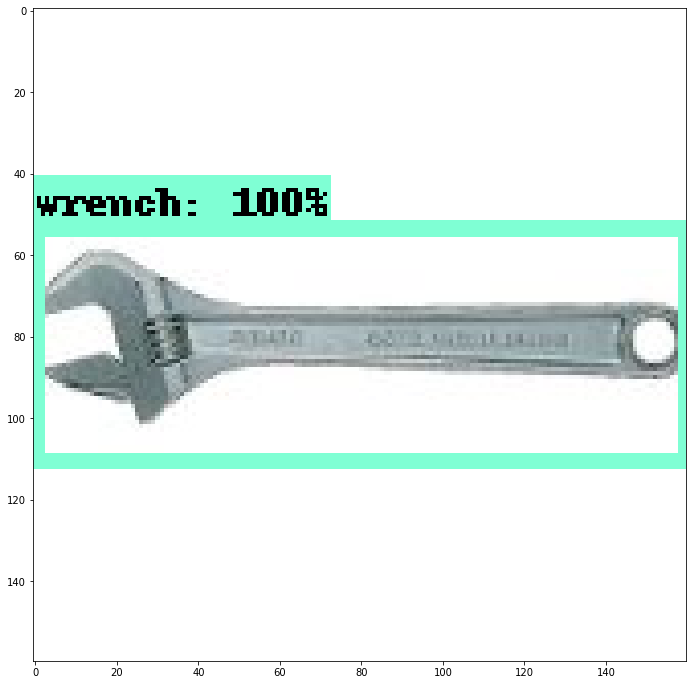

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

for image_path in img:
    print('Running inference for {}... '.format(image_path), end='')
    image_np=load_image_into_numpy_array(image_path)
    input_tensor=tf.convert_to_tensor(image_np)
    input_tensor=input_tensor[tf.newaxis, ...]
    detections=detect_fn(input_tensor)
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    detections['num_detections']=num_detections
    detections['detection_classes']= detections['detection_classes'].astype(np.int64)
    image_np_with_detections=image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,     
          min_score_thresh=.5,      
          agnostic_mode=False)
    %matplotlib inline
    plt.figure(figsize=(12,12))
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()

## References:
- https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
- https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html#downloading-the-tensorflow-model-garden
- https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/auto_examples/index.html#examples